# Week 4 - Assignment

In [51]:
# import neccessary library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix


In [17]:
# import csv data into data variable
data = pd.read_csv('./Iris.csv')

# show general info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [18]:
# show first five rows of data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Regarding the data, each species will be identified by length and width of sepal and petal.
# Let's see how many type of iris in the dataset
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
# There are more than two types of iris.
# Therefore, Random Forest and Decision Tree are appropiate model for this problem.

# Import models and create their instance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()


In [35]:
# Split data into training and testing set
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Id', 'Species']).values
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [36]:
# Train Random Forest model
rfc.fit(X=X_train, y=y_train)

/Users/khanhle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
# Train Decision Tree model
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
# Evaluate Random Forest model
rfc_prediction = rfc.predict(X_test)

# Calculate accuracy score
accuracy_score(y_true=y_test, y_pred=rfc_prediction)

0.9555555555555556

In [45]:
# Evaluate Decision Tree model
dtc_prediction = dtc.predict(X_test)

# Calculate accuracy score
accuracy_score(y_true=y_test, y_pred=dtc_prediction)

0.9555555555555556

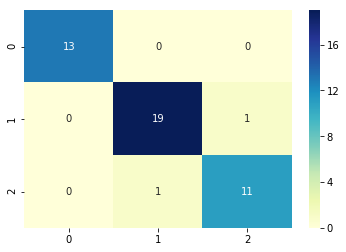

In [46]:
# Plot the heatmap for confusion matrix of Random Forest model
rfc_cfm = confusion_matrix(y_test, rfc_prediction)
sns.heatmap(rfc_cfm,cmap="YlGnBu", annot=True, fmt="d")

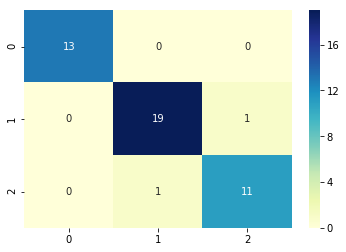

In [47]:
# Plot the heatmap for confusion matrix of Decision Tree model

dtc_cfm = confusion_matrix(y_test, dtc_prediction)
sns.heatmap(dtc_cfm,cmap="YlGnBu", annot=True, fmt="d")


[0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


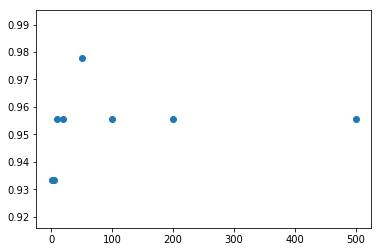

In [55]:
# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]

# Define a 'result' array to save the accuracy score of each trial
result = []

# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
print(result)

In [ ]:
# Conclusion
# Both models give similar accuracy. But with Random Forest model, it gives higher accus when using n_estimators = 50